In [2]:
from sklearn.datasets import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_iris = load_iris()
df = pd.DataFrame(data=df_iris.data, columns=df_iris.feature_names)

In [12]:
df['species'] = df_iris.target

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


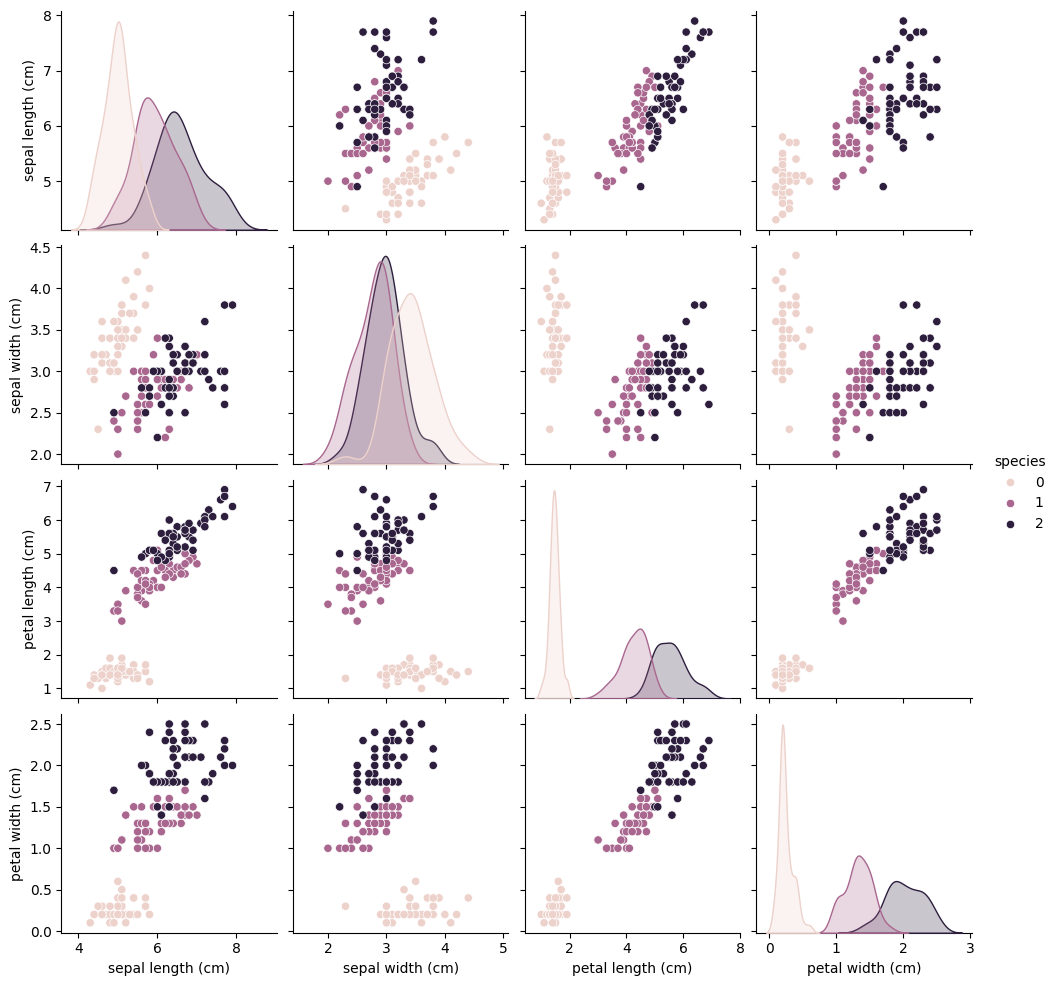

In [16]:
sns.pairplot(df, hue='species')

# Make clasification a bit difficult

In [17]:
new_df = df[df['species'] != 0][['sepal length (cm)', 'sepal width (cm)', 'species']]

In [18]:
new_df.head()

,sepal length (cm),sepal width (cm),species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [19]:
new_df.shape

(100, 3)

In [20]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [22]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [23]:
estimators = [('lr', clf1), ('knn', clf2), ('rf', clf3)]

In [24]:
for estimator in estimators:
  x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
  print(f'{estimator[0]} accuracy: {np.mean(x)}')

lr accuracy: 0.8066666666666669
knn accuracy: 0.76
rf accuracy: 0.7066666666666667


In [25]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [27]:
vc = VotingClassifier(estimators=estimators, voting='hard')
x = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print(np.round(np.mean(x), 2))

0.77


# Soft Voting

In [29]:
vc = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print(np.round(np.mean(x), 2))

0.76


# Weighted Voting

In [30]:
for i in range(1, 4):
  for j in range(1, 4):
    for k in range(1, 4):
      vc = VotingClassifier(estimators=estimators, voting='soft', weights=[i, j, k])
      x = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
      print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.75
for i=1,j=1,k=2 0.75
for i=1,j=1,k=3 0.73
for i=1,j=2,k=1 0.76
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.76
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.75
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.76
for i=2,j=1,k=3 0.75
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.75
for i=2,j=2,k=3 0.75
for i=2,j=3,k=1 0.75
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.75
for i=3,j=1,k=1 0.79
for i=3,j=1,k=2 0.77
for i=3,j=1,k=3 0.77
for i=3,j=2,k=1 0.79
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.76
for i=3,j=3,k=1 0.79
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.77
